## Problem Statement: 

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
dfa = pd.read_excel(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Third-Phase-Evaluation-Projects--1-\Zomato Restaurant\Country-Code.xlsx")
dfb = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Third-Phase-Evaluation-Projects--1-\Zomato Restaurant\zomato.csv")

In [3]:
dfa

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
dfb

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
df=pd.merge(dfb,dfa,on='Country Code', how='left')

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

#### Columns
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
- Latitude: Latitude coordinate of the restaurant&#39;s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people
- Country:Country Name

#### Targets
1) Price range
2) Average Cost for two


#### Analising basic metrics

In [7]:
df.shape

(9551, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

##### Findings

- There are 9 Null Values Which are needed to be removed

In [11]:
df=df.dropna()

In [12]:
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
Country Code              15
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [13]:
for i in df.columns:
    print (i,'\n',df[i].unique(),end='\n\n\n')

Restaurant ID 
 [6317637 6304287 6300002 ... 5915807 5916112 5927402]


Restaurant Name 
 ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]


Country Code 
 [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


City 
 ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Monroe' 'Montville' 'Ojo Caliente'
 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola' 

In [14]:
df[['Aggregate rating', 'Rating color', 'Rating text']].value_counts().to_frame().sort_values('Aggregate rating')

,,,0
Aggregate rating,Rating color,Rating text,
0.0,White,Not rated,2148
1.8,Red,Poor,1
1.9,Red,Poor,2
2.0,Red,Poor,7
2.1,Red,Poor,15
2.2,Red,Poor,27
2.3,Red,Poor,47
2.4,Red,Poor,87
2.5,Orange,Average,110


we can observe that rating colour and rating text depend on Aggregate rating

#### Adding conversion rate column for better accuracy

In [15]:
df[['Currency','Country']].value_counts().to_frame()

,,0
Currency,Country,
Indian Rupees(Rs.),India,8652
Dollar($),United States,425
Pounds(Œ£),United Kingdom,80
Brazilian Real(R$),Brazil,60
Emirati Diram(AED),UAE,60
Rand(R),South Africa,60
NewZealand($),New Zealand,40
Turkish Lira(TL),Turkey,34
Dollar($),Australia,24


In [16]:
df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [17]:
cur_df=pd.DataFrame({'Country':['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],'ind rate':[1.47,16.72,83.19,53.66,61.62,61.24,22.65,1,0.0054,49.56,105.9,22.80,4.34,0.26,3.07]})
cur_df

,Country,ind rate
0,Phillipines,1.4700
1,Brazil,16.7200
2,United States,83.1900
3,Australia,53.6600
4,Canada,61.6200
5,Singapore,61.2400
6,UAE,22.6500
7,India,1.0000
8,Indonesia,0.0054
9,New Zealand,49.5600


In [18]:
df=pd.merge(df,cur_df,on='Country', how='left')

In [19]:
df['Avg_ind price for 2'] = df['Average Cost for two']*df['ind rate']

#### Using 1st Cuisines value as only Cuisine value

This might help data set in gaining accuracy

In [20]:
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0])

In [21]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,ind rate,Avg_ind price for 2
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.47,1617.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.47,1764.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Seafood,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,1.47,5880.0


In [22]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,ind rate,Avg_ind price for 2
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060,6.334301,815.010034
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324,19.907615,1169.569238
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.005400,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000,1.000000,300.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000,1.000000,500.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000,1.000000,831.900000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,105.900000,30620.000000


Data Visualization

In [23]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns[1:23]:
    if df[i].nunique() < 16:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

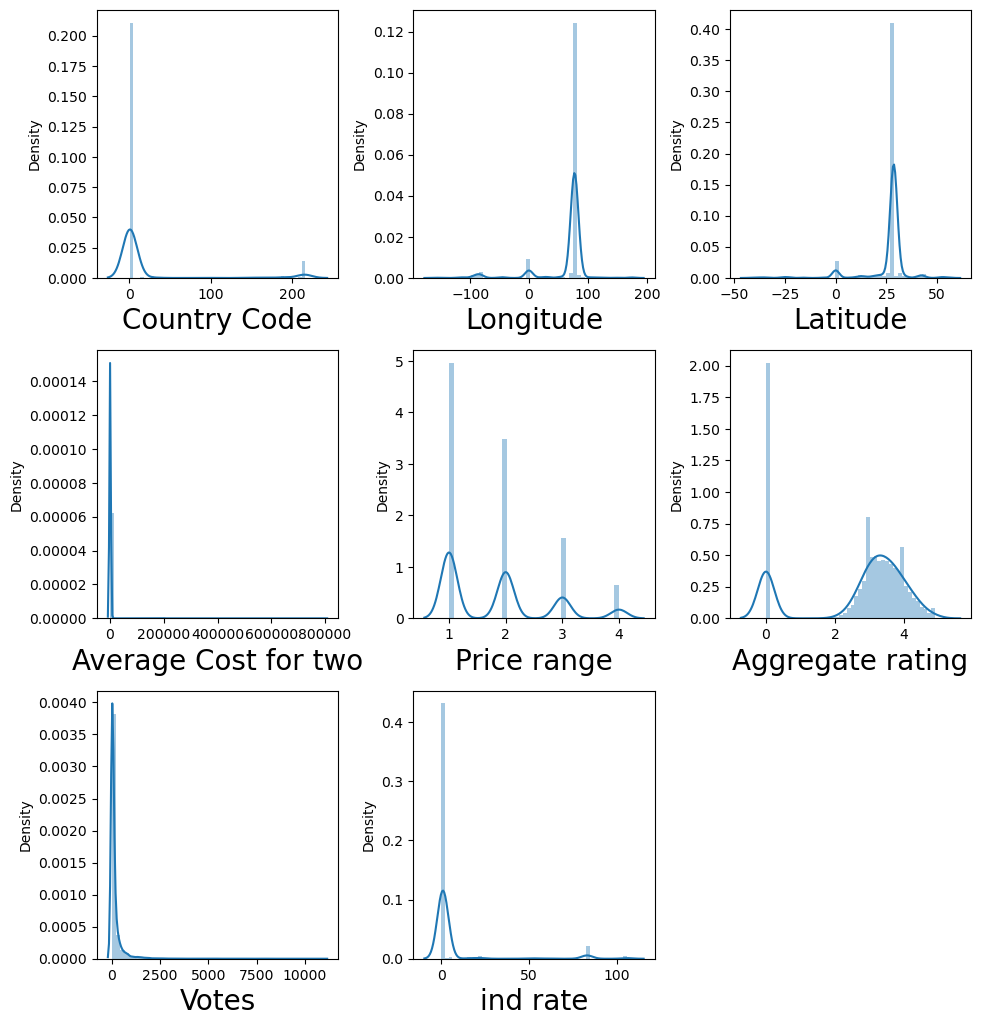

In [24]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- We can observe that Most of the columns are skewed (Not Normally Distrubuted)
	

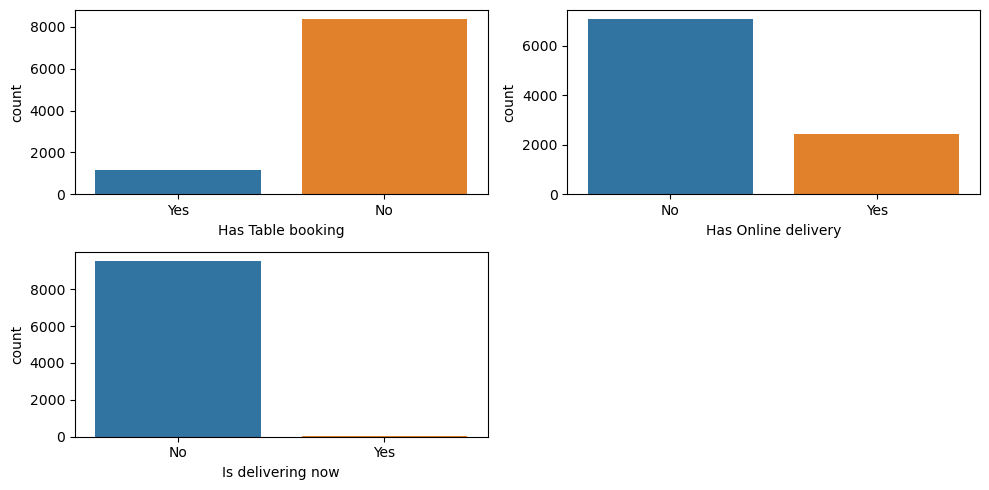

In [25]:
pn = 1
plt.figure(figsize=(10,5))
for i in ['Has Table booking','Has Online delivery', 'Is delivering now']:
    sns.countplot(data=df,x=i,ax=plt.subplot(2,2,pn))
    pn+=1
    plt.tight_layout()

    
    

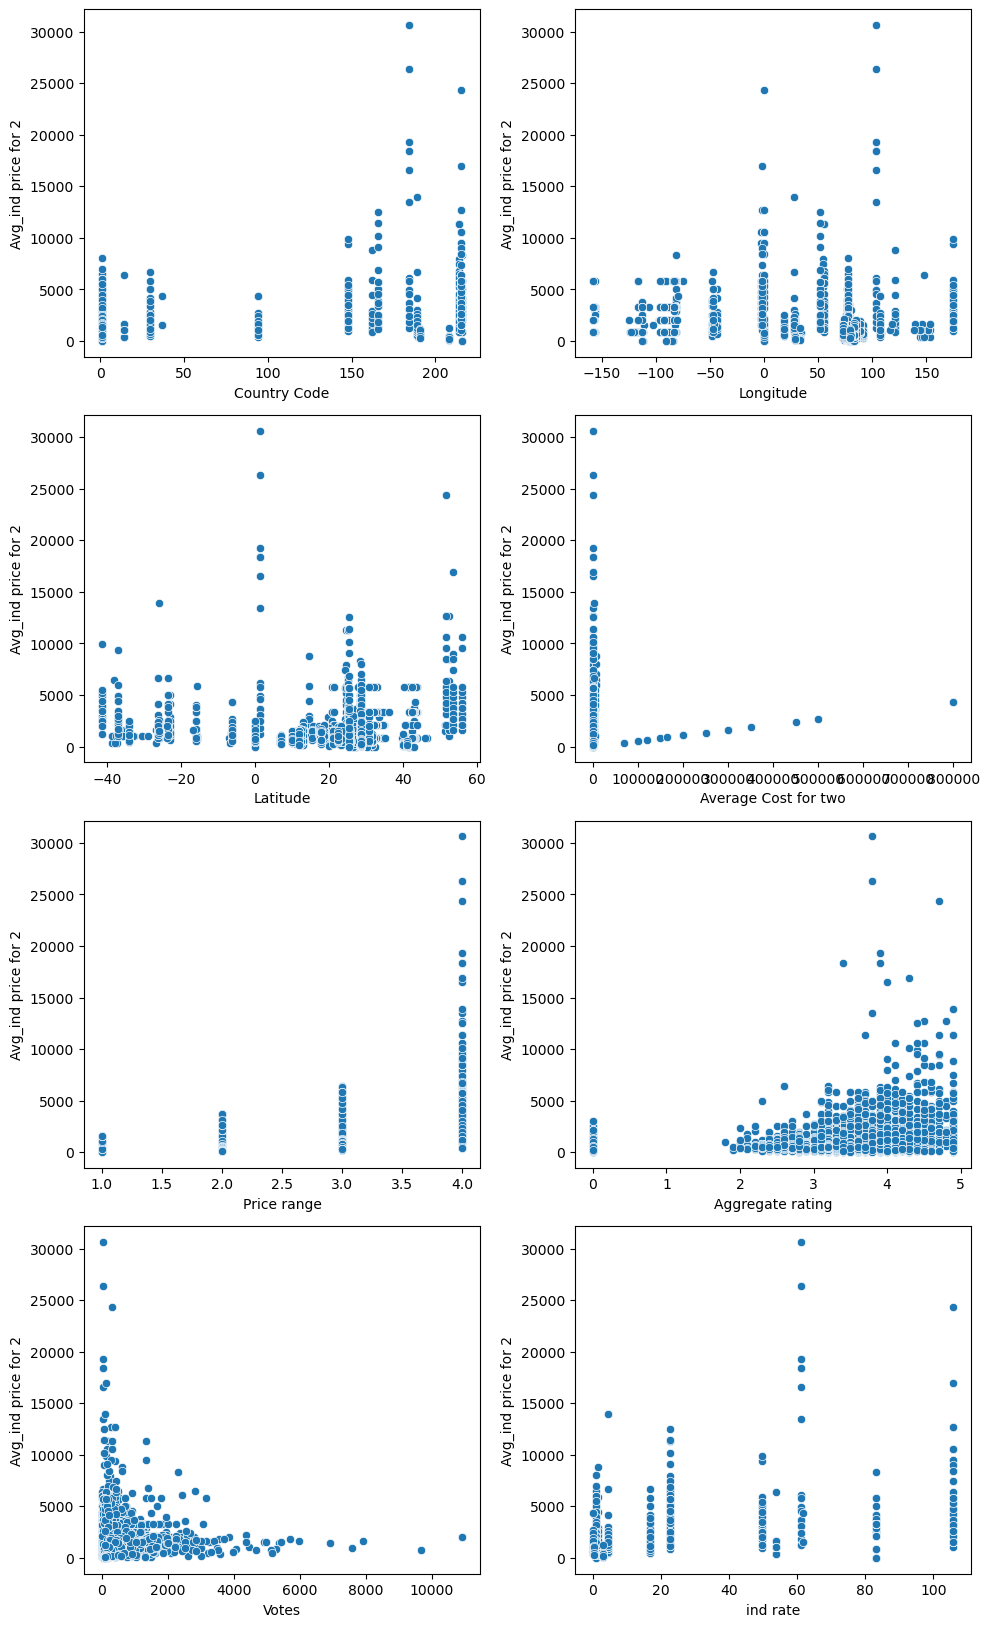

In [26]:
pn = 1
plt.figure(figsize=(10,20))
for i in num_col:
    sns.scatterplot(x=df[i],y=df['Avg_ind price for 2'],ax=plt.subplot(5,2,pn))
    pn+=1
    plt.tight_layout()

- Most of the Costly hotels have votes less than 2000
- Most of the Costly hotels have Rating grater than 3.5
- Average price of hotels depends on Price Range

In [27]:
df_con_g = df.groupby('Country').mean()

<BarContainer object of 15 artists>

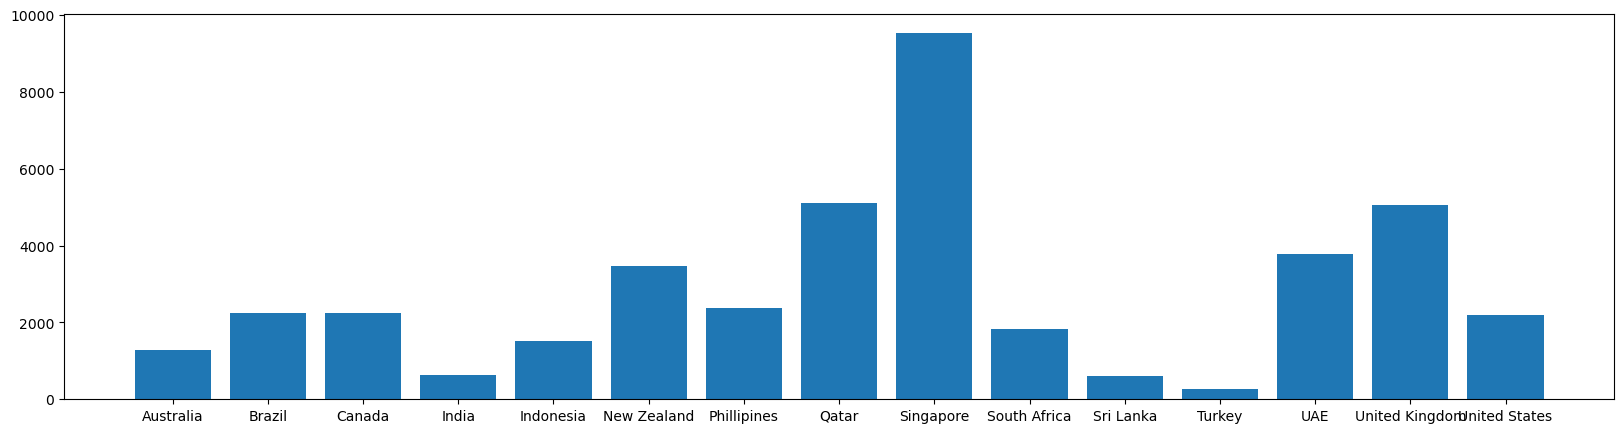

In [28]:
plt.figure(figsize=(20,5))
plt.bar(x=df_con_g.index,height=df_con_g['Avg_ind price for 2'])

- Singapore Hotels are costliest
- Turkey Hotels are cheapest

#### Data Pre-Processing

In [29]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,ind rate,Avg_ind price for 2
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,1.47,1617.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1.47,1764.0


In [30]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'ind rate', 'Avg_ind price for 2'],
      dtype='object')

In [31]:
# Removing Few Columns
df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Country Code','Address','Locality', 'Locality Verbose','Currency','Rating color', 'Rating text','Switch to order menu','Avg_ind price for 2'],inplace=True)

##### Encoading Categorical columns

In [32]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns:
    if df[i].nunique() < 16:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

In [33]:
# Encoading Binary Columns with LabelEncoader
from sklearn.preprocessing import LabelEncoder
lbn = LabelEncoder()
for i in obj_col:
    if df[i].nunique() ==2:
        df[i]= lbn.fit_transform(df[i])
        label_mapping = dict(zip(lbn.classes_, lbn.transform(lbn.classes_)))
        print("Label mapping:", label_mapping)




Label mapping: {'No': 0, 'Yes': 1}
Label mapping: {'No': 0, 'Yes': 1}
Label mapping: {'No': 0, 'Yes': 1}


In [34]:
#Binary Encoading for remaining columns
from category_encoders import BinaryEncoder
ben = BinaryEncoder()
df = ben.fit_transform(df)

df.head(2)

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,Longitude,Latitude,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,Country_1,Country_2,Country_3,ind rate
0,0,0,0,0,0,0,0,1,121.027535,14.565443,0,0,0,0,0,0,1,1100,1,0,0,3,4.8,314,0,0,0,1,1.47
1,0,0,0,0,0,0,0,1,121.014101,14.553708,0,0,0,0,0,1,0,1200,1,0,0,3,4.5,591,0,0,0,1,1.47


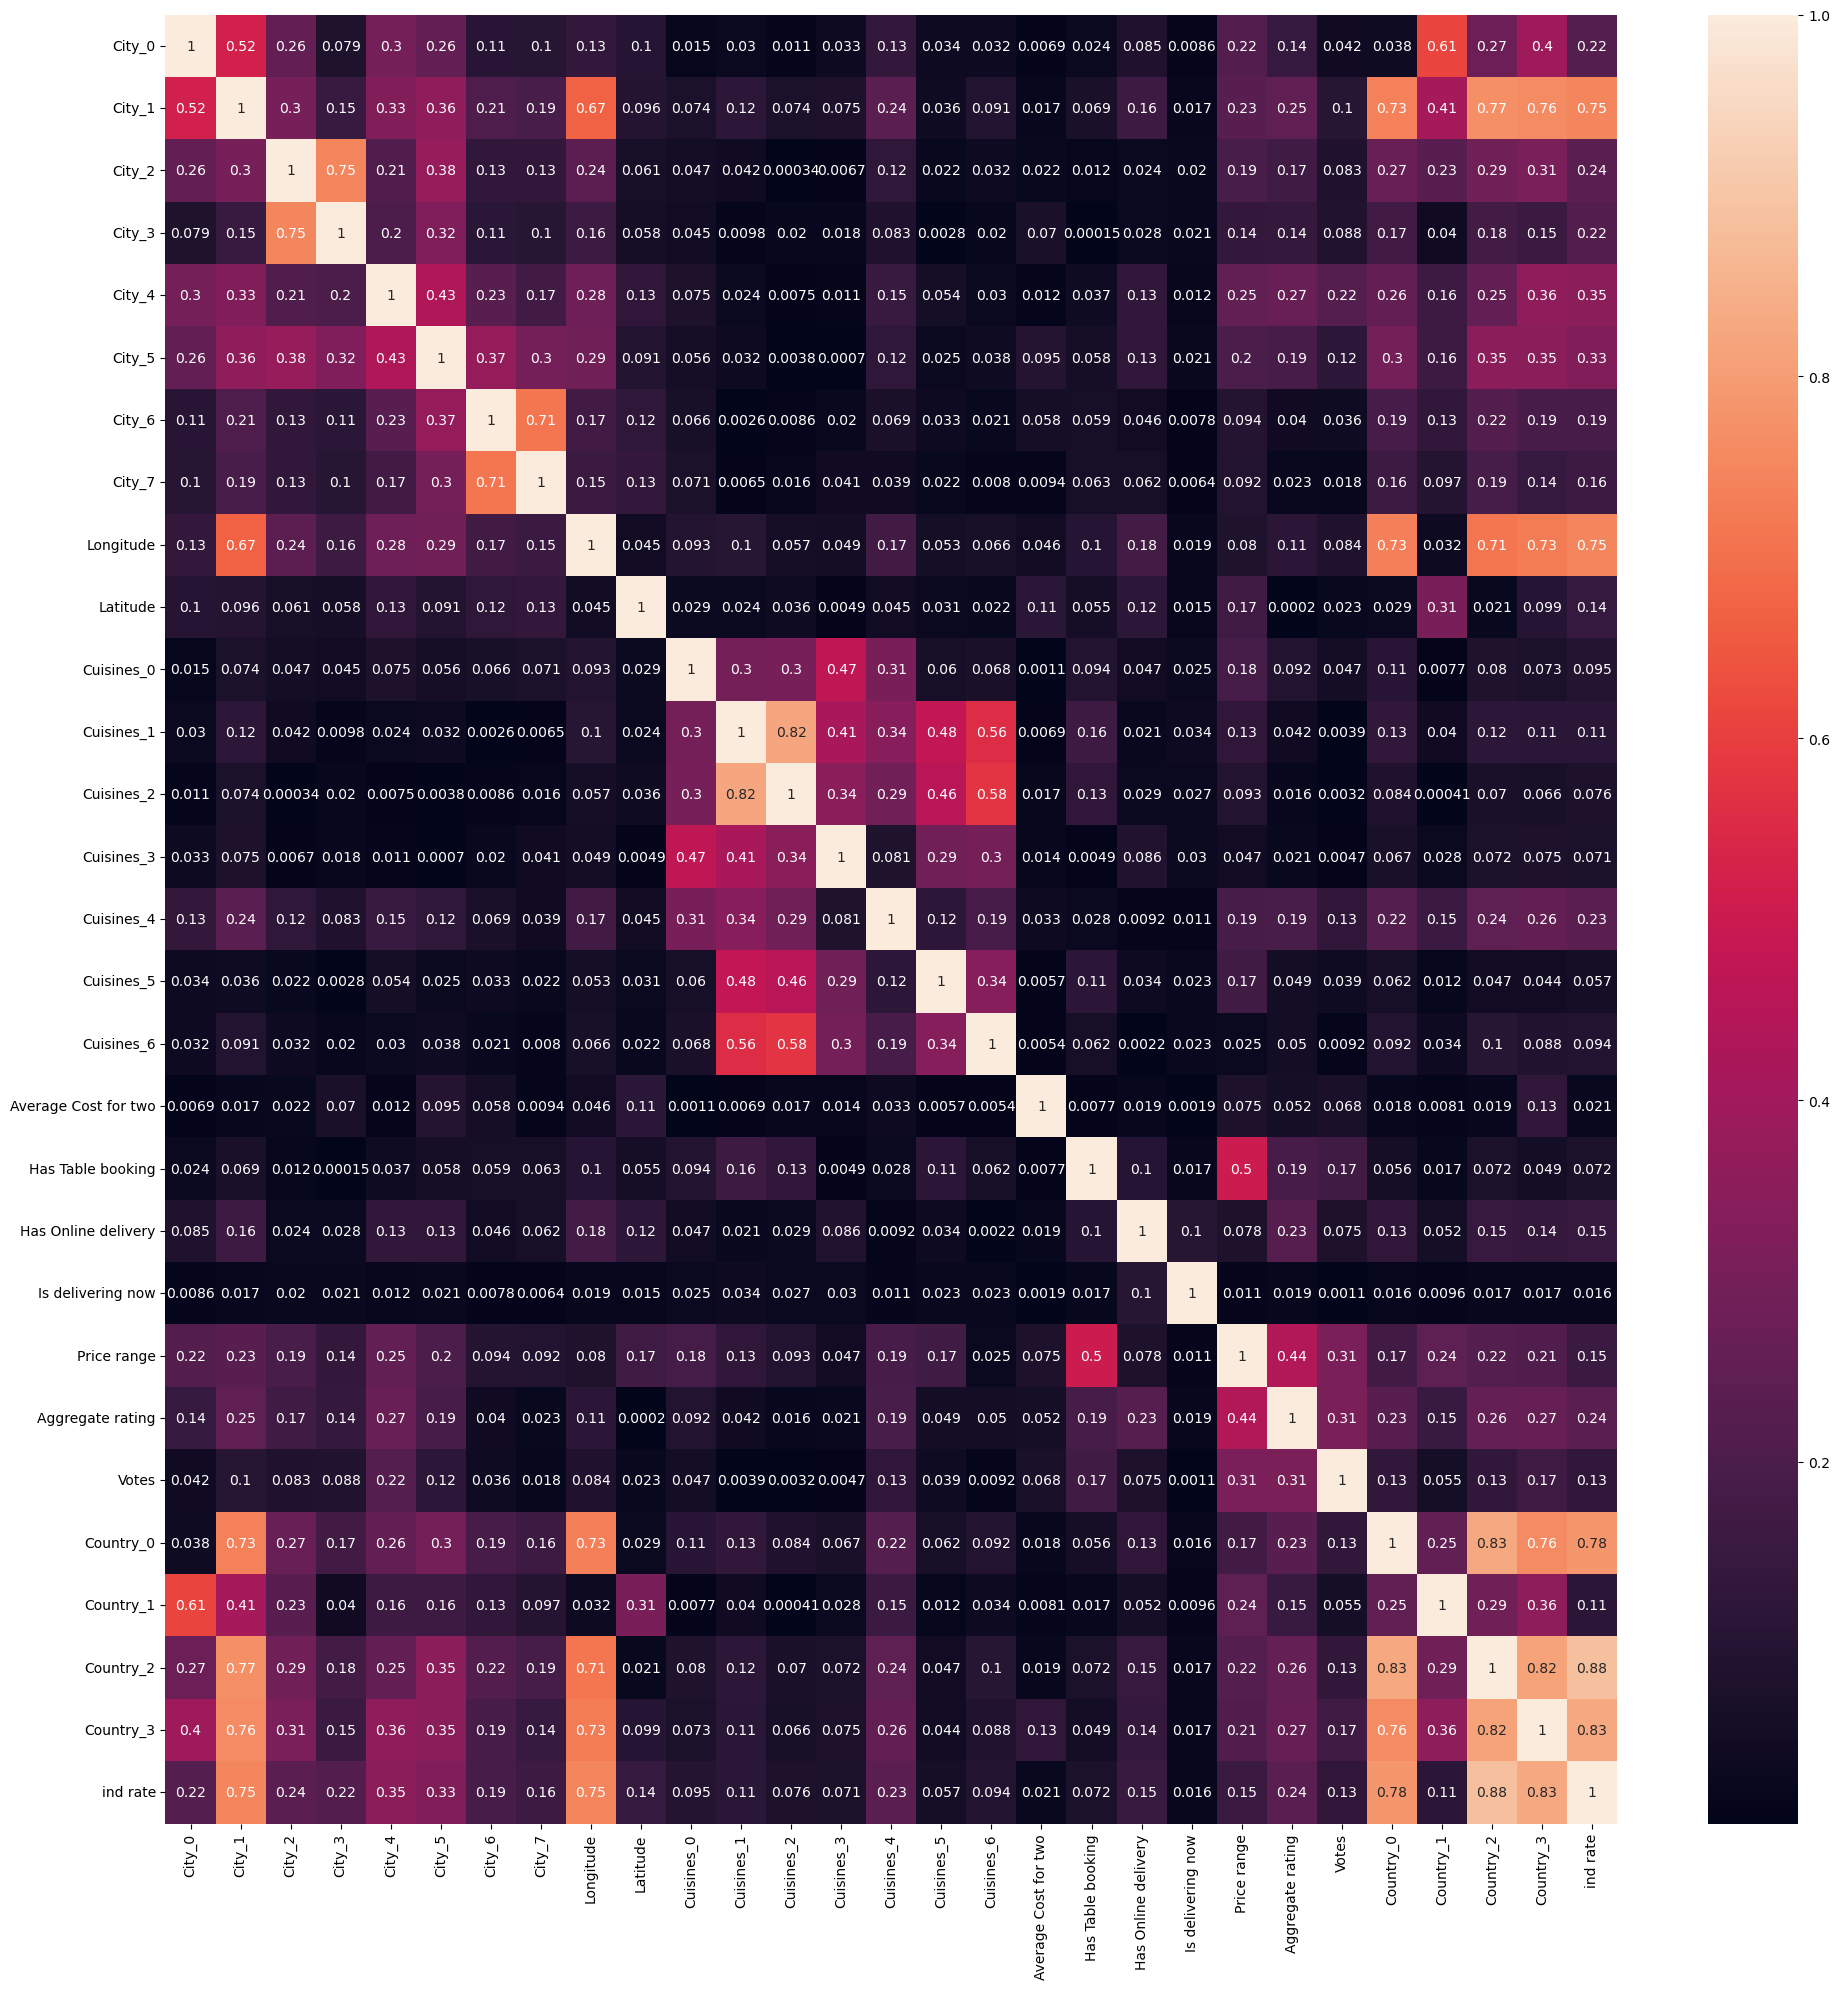

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- Longitude column has corelation with country columns so this can be removed
- Ind rate column has corelation with country columns but we can keep it for better accuracy

##### Outlier Treatment

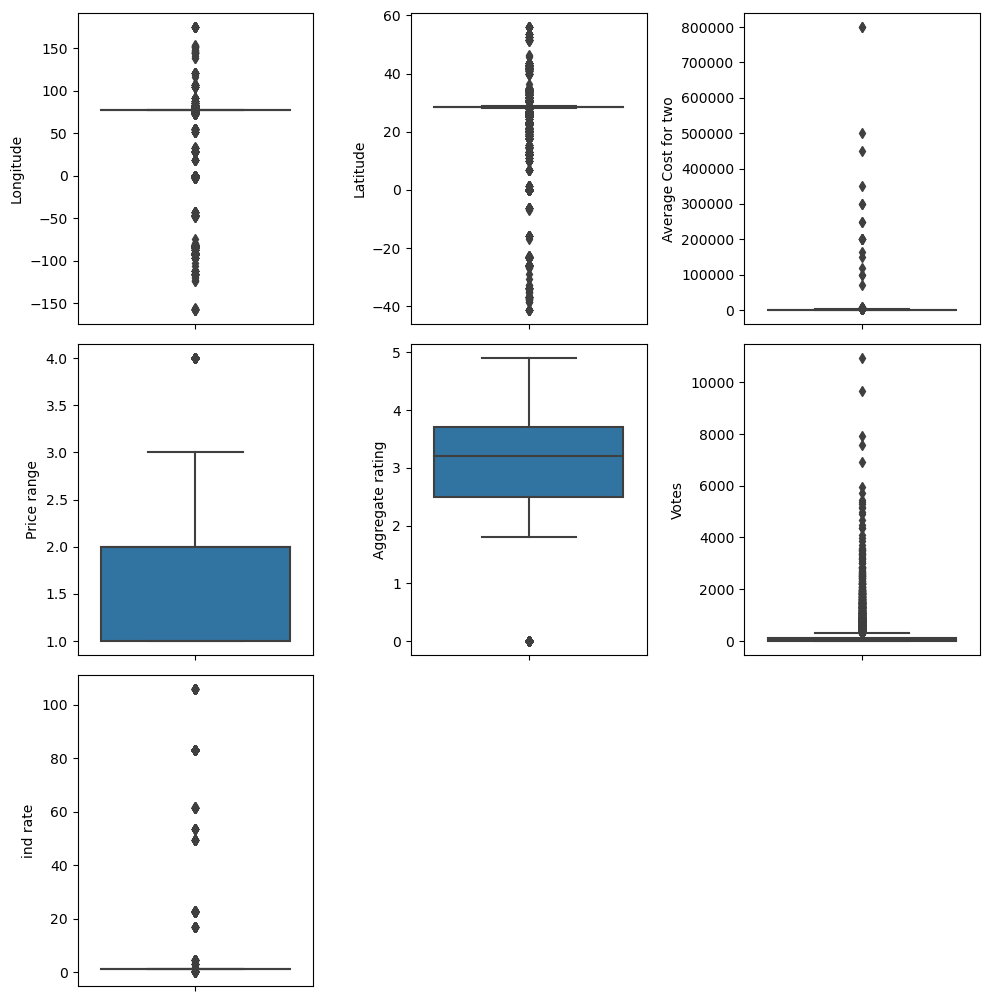

In [36]:
plt.figure(figsize=(10,20))
pn=1
for i in num_col:
    sns.boxplot(data=df,y=i,ax=plt.subplot(6,3,pn))
    pn+=1
plt.tight_layout()    

- We cannot remove outliers Latitude and Longitude, because that would remove few cities or countries from dataset. But we can remove whole Latitude and Longitude columns because we already have city and country columns intact.
- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [37]:
df.drop(columns=[ 'Longitude', 'Latitude'],inplace=True)

In [38]:
num_col.remove('Longitude')
num_col.remove('Latitude')

In [39]:
prev = df.shape

- we can ignore Ind Rate

In [40]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[num_col[:-1]]))
z[z>3].count()

Average Cost for two     21
Price range               0
Aggregate rating          0
Votes                   173
dtype: int64

In [41]:
df[num_col[:-1]] = df[num_col[:-1]][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,Country_1,Country_2,Country_3,ind rate
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1100.0,1,0,0,3,4.8,314.0,0,0,0,1,1.47
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1200.0,1,0,0,3,4.5,591.0,0,0,0,1,1.47
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,4000.0,1,0,0,4,4.4,270.0,0,0,0,1,1.47
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1500.0,0,0,0,4,4.9,365.0,0,0,0,1,1.47
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1500.0,1,0,0,4,4.8,229.0,0,0,0,1,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,80.0,0,0,0,3,4.1,788.0,1,1,1,1,3.07
9349,1,0,0,0,1,1,0,0,1,1,1,0,1,0,1,105.0,0,0,0,3,4.2,1034.0,1,1,1,1,3.07
9350,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,170.0,0,0,0,4,3.7,661.0,1,1,1,1,3.07
9351,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,120.0,0,0,0,4,4.0,901.0,1,1,1,1,3.07


In [42]:
df.shape

(9353, 27)

In [43]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  1.98 %


Since our data loss is only 1.98% we can continue

## Target 1 : Price Range(Classification)

#### Treating Skewness

In [44]:
num_col1 = num_col.copy()
num_col1.remove('Price range')

In [45]:
x = df.drop(columns='Price range')
y=df['Price range']

In [46]:
y.value_counts()

1    4431
2    3075
3    1294
4     553
Name: Price range, dtype: int64

In [47]:
x[num_col1].skew().abs()

Average Cost for two    3.620465
Aggregate rating        0.939831
Votes                   3.219845
ind rate                3.747761
dtype: float64

skeweness of All numerical Needs to be Treated

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
x[num_col1] = pt.fit_transform(x[num_col1])
x

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Country_0,Country_1,Country_2,Country_3,ind rate
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,18.090210,1,0,0,11.835379,6.341541,0,0,0,1,0.341256
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,18.557051,1,0,0,10.733469,7.114035,0,0,0,1,0.341256
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,26.119882,1,0,0,10.375971,6.159719,0,0,0,1,0.341256
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,19.799633,0,0,0,12.212416,6.523799,0,0,0,1,0.341256
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,19.799633,1,0,0,11.835379,5.962515,0,0,0,1,0.341256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,7.765831,0,0,0,9.333209,7.471168,1,1,1,1,0.365984
9349,1,0,0,0,1,1,0,0,1,1,1,0,1,0,1,8.558171,0,0,0,9.675818,7.811730,1,1,1,1,0.365984
9350,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,10.098686,0,0,0,8.013128,7.252572,1,1,1,1,0.365984
9351,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,8.967086,0,0,0,8.995610,7.638746,1,1,1,1,0.365984


### Resampling

we shall use Smote 

In [49]:

from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy='auto')
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

3    4431
4    4431
2    4431
1    4431
Name: Price range, dtype: int64

#### Standerd scaler

In [50]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Country_0,Country_1,Country_2,Country_3,ind rate
0,-0.230612,-2.551503,-1.469667,-0.542833,-2.411286,-2.207434,-0.528528,0.612301,-0.305613,-0.825201,-0.889906,-1.406529,-1.212962,-1.185829,0.817495,0.551069,1.821734,-0.52442,-0.044482,1.649702,0.967185,-2.967001,-0.255860,-0.378013,2.870693,0.726158
1,-0.230612,-2.551503,-1.469667,-0.542833,-2.411286,-2.207434,-0.528528,0.612301,-0.305613,-0.825201,-0.889906,-1.406529,-1.212962,0.843292,-1.223249,0.642308,1.821734,-0.52442,-0.044482,1.298067,1.328798,-2.967001,-0.255860,-0.378013,2.870693,0.726158
2,-0.230612,-2.551503,-1.469667,-0.542833,-2.411286,-2.207434,1.892048,-1.633183,-0.305613,-0.825201,-0.889906,-1.406529,-1.212962,0.843292,0.817495,2.120370,1.821734,-0.52442,-0.044482,1.183985,0.882072,-2.967001,-0.255860,-0.378013,2.870693,0.726158
3,-0.230612,-2.551503,-1.469667,-0.542833,-2.411286,-2.207434,1.892048,-1.633183,-0.305613,-0.825201,-0.889906,-1.406529,-1.212962,0.843292,-1.223249,0.885155,-0.548928,-0.52442,-0.044482,1.770020,1.052502,-2.967001,-0.255860,-0.378013,2.870693,0.726158
4,-0.230612,-2.551503,-1.469667,-0.542833,-2.411286,-2.207434,1.892048,-1.633183,-0.305613,-0.825201,-0.889906,-1.406529,-1.212962,0.843292,-1.223249,0.885155,1.821734,-0.52442,-0.044482,1.649702,0.789759,-2.967001,-0.255860,-0.378013,2.870693,0.726158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17719,-0.230612,0.391926,0.680426,-0.542833,0.414716,0.453015,-0.528528,0.612301,-0.305613,-0.825201,-0.889906,-1.406529,-1.212962,-1.185829,-1.223249,2.272182,1.821734,-0.52442,-0.044482,0.338870,0.060452,0.337041,-0.255860,-0.378013,-0.348348,-0.371436
17720,4.336283,-2.551503,-1.469667,-0.542833,0.414716,-2.207434,-0.528528,0.612301,-0.305613,-0.825201,-0.889906,0.710970,-1.212962,0.843292,0.817495,-0.458981,-0.548928,-0.52442,-0.044482,0.558887,1.069837,0.337041,3.908386,-0.378013,2.870693,1.992241
17721,-0.230612,0.391926,0.680426,-0.542833,0.414716,0.453015,-0.528528,0.612301,-0.305613,-0.825201,-0.889906,0.710970,-1.212962,0.843292,-1.223249,1.217973,-0.548928,-0.52442,-0.044482,0.160292,-0.570257,0.337041,-0.255860,-0.378013,-0.348348,-0.371436
17722,-0.230612,0.391926,0.680426,-0.542833,0.414716,0.453015,-0.528528,0.612301,-0.305613,-0.825201,-0.889906,-1.406529,0.824428,-1.185829,-1.223249,1.293333,1.821734,-0.52442,-0.044482,0.698029,0.852449,0.337041,-0.255860,-0.378013,-0.348348,-0.371436


### Train test Split

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [52]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [53]:
# finding best random state
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)


    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
125,196.0,91.529376,91.717445
75,119.0,91.499285,91.108102
11,18.0,91.499285,90.995261
72,116.0,91.499285,90.927556
128,199.0,91.484240,90.634168
...,...,...,...
116,179.0,91.078011,91.175807
127,198.0,91.062965,91.108102
119,182.0,91.055443,91.356353
47,77.0,91.032874,91.311216


- we can observe that Random state 49 we get max accuracy wit minimum difference

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=49)

### Training the model

In [55]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return accuracy_score(y_te,model.predict(x_te))


Logistic regression 

In [56]:
lr = LogisticRegression()
lr_ac_score = mod_train(lr,x_train,x_test,y_train,y_test)
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(4,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score*100,'\nAccuracy score',lr_ac_score*100,end = '\n\n')
    


cv =  4 
Cross Validation score =  87.60437824418868 
Accuracy score 91.53689911983751


cv =  5 
Cross Validation score =  87.79065672886813 
Accuracy score 91.53689911983751


cv =  6 
Cross Validation score =  89.02617919205596 
Accuracy score 91.53689911983751


cv =  7 
Cross Validation score =  89.30828255472805 
Accuracy score 91.53689911983751


cv =  8 
Cross Validation score =  89.37062233622089 
Accuracy score 91.53689911983751


cv =  9 
Cross Validation score =  89.39912696428023 
Accuracy score 91.53689911983751



- cv = 9 is giving best result

In [57]:
cv = 9

In [58]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [59]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',lr_s_cv_score*100,'\nAccuracy score = ',lr_ac_score*100,'\nDifference = ',lr_ac_score*100-(lr_s_cv_score*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score*100,2),'Test accuracy':round(lr_ac_score*100,2),'Difference':round(np.abs(lr_ac_score*100-(lr_s_cv_score*100)),2)},ignore_index=True)


Cross Validation score =  89.39912696428023 
Accuracy score =  91.53689911983751 
Difference =  2.137772155557286


##### Random  forest classifer

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_ac_score = mod_train(rfc,x_train,x_test,y_train,y_test)

# cross validation
rfc_s_cv_score_mean=cross_val_score(rfc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score*100,'\nDifference = ',np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score*100,2),'Difference':round(np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  97.74919601253151 
Accuracy score =  98.96185962536673 
Difference =  1.2126636128352146


##### AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_ac_score = mod_train(abc,x_train,x_test,y_train,y_test)

# cross validation
abc_s_cv_score_mean=cross_val_score(abc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score*100,'\nDifference = ',np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'AdaBoost Classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score*100,2),'Difference':round(np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  71.4007098750314 
Accuracy score =  75.3103136989393 
Difference =  3.9096038239079007


##### GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_ac_score = mod_train(gbc,x_train,x_test,y_train,y_test)

# cross validation
gbc_s_cv_score_mean=cross_val_score(gbc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score*100,'\nDifference = ',np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Gradient Boosting Classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score*100,2),'Difference':round(np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  96.00563385607201 
Accuracy score =  96.65989618596254 
Difference =  0.6542623298905283


##### XGBClassifier

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

# for xgb classifier classification must start from 0 insted of 1, Therefore we use y-1 insted of y
xgb_ac_score = mod_train(xgb,x_train,x_test,y_train-1,y_test-1)

# cross validation
xgb_s_cv_score_mean=cross_val_score(xgb,x_scaled,y-1,cv=cv).mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score*100,'\nDifference = ',np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'XGBoost Classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score*100,2),'Difference':round(np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  97.99178868628434 
Accuracy score =  99.00699616339426 
Difference =  1.015207477109925


##### SVC

In [64]:
from sklearn.svm import SVC
svc = SVC()
svc_ac_score = mod_train(svc,x_train,x_test,y_train,y_test)

# cross validation
svc_s_cv_score_mean=cross_val_score(svc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score*100,'\nDifference = ',np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score*100,2),'Difference':round(np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  90.57834391328421 
Accuracy score =  92.8232904536222 
Difference =  2.244946540337992


##### KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_ac_score = mod_train(knn,x_train,x_test,y_train,y_test)

# cross validation
knn_s_cv_score_mean=cross_val_score(knn,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score*100,'\nDifference = ',np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score*100,2),'Difference':round(np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  84.20886687823703 
Accuracy score =  86.25592417061611 
Difference =  2.0470572923790797


In [66]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
4,XGBoost Classifier,97.99,99.01,1.02
1,Random forest classifier,97.75,98.96,1.21
3,Gradient Boosting Classifier,96.01,96.66,0.65
5,SVC,90.58,92.82,2.24
0,Logistic regression,89.40,91.54,2.14
6,KNN Classifier,84.21,86.26,2.05
2,AdaBoost Classifier,71.40,75.31,3.91


- we can observe that RandomForest Classifier is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [67]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid  = {
    'max_depth': [None, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [69]:
# using grid search cv
gcv = GridSearchCV(estimator=RandomForestClassifier(random_state=8),param_grid=param_grid,cv=cv,scoring='accuracy',n_jobs=-1)
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto'}
Best score: 0.989468141126909


### Training with best parms

In [70]:
final_model = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= None, max_features= 'auto',random_state=8)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

99.1198375084631


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1106
           2       0.98      0.99      0.99      1068
           3       0.99      0.99      0.99      1115
           4       0.99      1.00      1.00      1142

    accuracy                           0.99      4431
   macro avg       0.99      0.99      0.99      4431
weighted avg       0.99      0.99      0.99      4431



### Saving Model

In [72]:
import pickle
with open('final_LR_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

- Our Final Model Predicts Income with Almost 99% Test Accuracy
- From Accuracy Scor and ROC_GRAPH we can say That Our Model Is Best Model

## Target 2: Average Cost for two (Regression)

#### Treating Skewness

In [73]:
num_col2 = num_col.copy()
num_col2.remove('Average Cost for two')

In [74]:
x = df.drop(columns='Average Cost for two')
y=df['Average Cost for two']

In [75]:
x[num_col2].skew().abs()

Price range         0.933887
Aggregate rating    0.939831
Votes               3.219845
ind rate            3.747761
dtype: float64

skeweness of All numerical Needs to be Treated

In [76]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
x[num_col2] = pt.fit_transform(x[num_col2])
x

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,Country_1,Country_2,Country_3,ind rate
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0.654593,11.835379,6.341541,0,0,0,1,0.341256
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0.654593,10.733469,7.114035,0,0,0,1,0.341256
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0.688400,10.375971,6.159719,0,0,0,1,0.341256
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.688400,12.212416,6.523799,0,0,0,1,0.341256
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0.688400,11.835379,5.962515,0,0,0,1,0.341256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0.654593,9.333209,7.471168,1,1,1,1,0.365984
9349,1,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,0.654593,9.675818,7.811730,1,1,1,1,0.365984
9350,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0.688400,8.013128,7.252572,1,1,1,1,0.365984
9351,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0.688400,8.995610,7.638746,1,1,1,1,0.365984


#### Standerd scaler

In [77]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,Cuisines_0,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes,Country_0,Country_1,Country_2,Country_3,ind rate
0,-0.145538,-3.594183,-1.776244,-0.543534,-3.357719,-2.847298,-0.546174,0.533622,-0.412491,-0.816824,-0.907694,-1.566067,-1.572602,-1.167758,0.745294,2.744769,-0.586528,-0.060402,1.309171,1.864371,1.303148,-3.829708,-0.161936,-0.289009,3.608669,1.158008
1,-0.145538,-3.594183,-1.776244,-0.543534,-3.357719,-2.847298,-0.546174,0.533622,-0.412491,-0.816824,-0.907694,-1.566067,-1.572602,0.856342,-1.341752,2.744769,-0.586528,-0.060402,1.309171,1.537271,1.657112,-3.829708,-0.161936,-0.289009,3.608669,1.158008
2,-0.145538,-3.594183,-1.776244,-0.543534,-3.357719,-2.847298,1.830917,-1.873985,-0.412491,-0.816824,-0.907694,-1.566067,-1.572602,0.856342,0.745294,2.744769,-0.586528,-0.060402,1.714931,1.431148,1.219836,-3.829708,-0.161936,-0.289009,3.608669,1.158008
3,-0.145538,-3.594183,-1.776244,-0.543534,-3.357719,-2.847298,1.830917,-1.873985,-0.412491,-0.816824,-0.907694,-1.566067,-1.572602,0.856342,-1.341752,-0.364329,-0.586528,-0.060402,1.714931,1.976293,1.386661,-3.829708,-0.161936,-0.289009,3.608669,1.158008
4,-0.145538,-3.594183,-1.776244,-0.543534,-3.357719,-2.847298,1.830917,-1.873985,-0.412491,-0.816824,-0.907694,-1.566067,-1.572602,0.856342,-1.341752,2.744769,-0.586528,-0.060402,1.714931,1.864371,1.129475,-3.829708,-0.161936,-0.289009,3.608669,1.158008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,6.871051,-3.594183,-1.776244,-0.543534,0.297821,0.351210,-0.546174,-1.873985,-0.412491,1.224254,1.101693,0.638542,-1.572602,-1.167758,0.745294,-0.364329,-0.586528,-0.060402,1.309171,1.121606,1.820753,0.261116,6.175264,3.460095,3.608669,2.547796
9349,6.871051,-3.594183,-1.776244,-0.543534,0.297821,0.351210,-0.546174,-1.873985,2.424295,1.224254,1.101693,-1.566067,0.635889,-1.167758,0.745294,-0.364329,-0.586528,-0.060402,1.309171,1.223309,1.976801,0.261116,6.175264,3.460095,3.608669,2.547796
9350,6.871051,-3.594183,-1.776244,-0.543534,0.297821,0.351210,-0.546174,-1.873985,-0.412491,-0.816824,-0.907694,0.638542,-1.572602,0.856342,0.745294,-0.364329,-0.586528,-0.060402,1.714931,0.729743,1.720590,0.261116,6.175264,3.460095,3.608669,2.547796
9351,6.871051,-3.594183,-1.776244,-0.543534,0.297821,0.351210,-0.546174,-1.873985,2.424295,1.224254,1.101693,-1.566067,0.635889,0.856342,0.745294,-0.364329,-0.586528,-0.060402,1.714931,1.021391,1.897539,0.261116,6.175264,3.460095,3.608669,2.547796


### Train test Split

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [79]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
5,75.0,63.865875,64.462654
10,102.0,63.866629,64.409031
15,130.0,63.850800,64.359868
19,163.0,63.879080,64.345080
12,108.0,63.888923,64.333558
14,127.0,63.893967,64.278829
17,137.0,63.873968,64.269639
9,99.0,63.924035,64.236255
6,80.0,63.952243,64.132493
18,157.0,63.945228,64.108847


- Therefore best random state is 75

In [80]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=75)

## Training models

In [81]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return r2_score(y_te,model.predict(x_te))


In [82]:
# Defining cv model using k fold
def cv_mod (model,x_scaled,y,cv):
    # Set the number of folds for cross-validation
    num_folds = cv

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x_scaled):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
        y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Return Calculated average MSE score
    return np.mean(r2_scores)

#### Linear Regression

In [83]:
lr = LinearRegression()


lr_r2_test_score = mod_train (lr,x_train,x_test,y_train,y_test)
print(lr_r2_test_score*100,"%")

64.46265449846702 %


In [84]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(2,10):
    avg_mse_score = cv_mod (LinearRegression(),x_scaled,y,i)

    # Print the average MSE score
    print('CV = ',i,"Average r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  2 Average r2 score: 63.57045 Difference =  0.8922
CV =  3 Average r2 score: 63.786 Difference =  0.6767
CV =  4 Average r2 score: 64.13983 Difference =  0.3228
CV =  5 Average r2 score: 64.01117 Difference =  0.4515


CV =  6 Average r2 score: 63.94415 Difference =  0.5185
CV =  7 Average r2 score: 64.0935 Difference =  0.3692
CV =  8 Average r2 score: 64.32506 Difference =  0.1376
CV =  9 Average r2 score: 64.43813 Difference =  0.0245


- cv = 8 is giving comparitively better result

In [85]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [86]:
#best cv score at cv = 8
cv = 8
avg_r2_score = cv_mod (LinearRegression(),x_scaled,y,cv)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  64.325058 % 
r2 score =  64.4627 % 
Difference =  0.1376 %



##### DecisionTreeRegressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

dtr_r2_test_score = mod_train (DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (DecisionTreeRegressor(),x_scaled,y,6)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)



Cross Validation score =  74.189354 % 
r2 score =  77.1093 % 
Difference =  2.92 %



##### RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
rfr_r2_test_score = mod_train (RandomForestRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (RandomForestRegressor(),x_scaled,y,cv)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  84.428413 % 
r2 score =  86.2738 % 
Difference =  1.8454 %



#### AdaBoostRegressor

In [89]:
from sklearn.ensemble import AdaBoostRegressor
abr_r2_test_score  = mod_train (AdaBoostRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (AdaBoostRegressor(),x_scaled,y,cv)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)



Cross Validation score =  71.792175 % 
r2 score =  75.533 % 
Difference =  3.7408 %



#### GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_r2_test_score  = mod_train (GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (GradientBoostingRegressor(),x_scaled,y,cv)
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  84.526304 % 
r2 score =  86.4869 % 
Difference =  1.9606 %



#### XGBRegressor

In [91]:
from xgboost import XGBRegressor
xgbr_r2_test_score = mod_train (XGBRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (XGBRegressor(),x_scaled,y,cv)
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)



Cross Validation score =  82.398193 % 
r2 score =  86.2883 % 
Difference =  3.8901 %



In [92]:
ms_df.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

,Model,CV score,Test accuracy,Difference
0,Gradient Boost regression,84.5263,86.4869,1.9606
1,XGBoost regression,82.3982,86.2883,3.8901
2,Random forest regression,84.4284,86.2738,1.8454
3,Decision Tree regression,74.1894,77.1093,2.9200
4,Ada Boost regression,71.7922,75.5330,3.7408
5,Linear regression,64.3251,64.4627,0.1376


- Gradient Boost Regression is giving best test accuracy and cv scores therefore we can use Random Forest Regression for our problem 


### Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
grid_parm = {
    'n_estimators': [100, 200],
    'learning_rate': [ 0.1, 0.2],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'random_state':[8,2,11]
}

In [94]:
gcv = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=grid_parm,cv=8,scoring = 'r2')
gcv.fit(x_train,y_train)
gcv.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 2}

In [95]:
final_model = GradientBoostingRegressor(learning_rate= 0.1, min_samples_leaf= 1,min_samples_split= 3,n_estimators= 200,random_state= 2)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [96]:
r2 = r2_score(y_test, final_model_test_pred)
mse_score = mean_absolute_error(y_test, final_model_test_pred)
mae_score = mean_squared_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score,)


R2 Score =  0.8657195788761776 
Mean Squared error =  117.55627017267182


Text(0.5, 1.0, 'Actual vs Predicted Test')

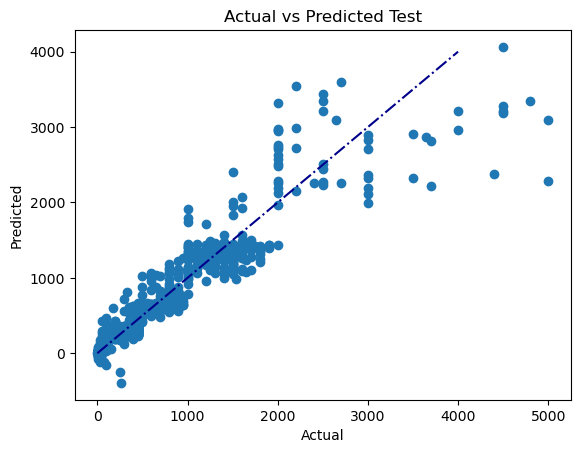

In [97]:
plt.scatter(y_test, final_model_test_pred)

plt.plot([0,4000],[0,4000],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test')

### Saving Model

In [98]:
import pickle
with open('final_gb_classifier_model.pkl', 'wb') as file:

    pickle.dump(final_model, file)

##### from graph and r2 score we can confidently say that our model predicted 86.6%% of data accurately